# Regionale Eigenschaften von Labels
In diesem Notebook charakterisieren wir Labels anhand des Mittelwerts und der Standardabweichung ihrer Eigenschaften, wie z.B. der Größe. Wenn benachbarte Objekte ähnlich groß sind, ist die Standardabweichung ihrer Größe gering. Wenn Labels unterschiedlicher Größe benachbart sind, ist die Standardabweichung ihrer Größe höher. Dies könnte genutzt werden, um Regionen in Geweben zu identifizieren, in denen Zellen unterschiedlicher Größe aufeinandertreffen.

In [1]:
from skimage.io import imread
import pyclesperanto_prototype as cle
import stackview

Die hier verwendeten Daten wurden von maize_clsm.tif abgeleitet, das von [hier](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/sampleImages/maize_clsm.tif) stammt, ein von David Legland unter der [CC-BY 4.0 Lizenz](https://github.com/dlegland/mathematical_morphology_with_MorphoLibJ/blob/master/LICENSE) geteiltes Bild

StackViewNDArray([[50, 27, 27, ..., 26, 26, 26],
                  [26,  1,  2, ...,  1,  1,  1],
                  [27,  1,  1, ...,  1,  1,  1],
                  ...,
                  [33,  5,  4, ...,  1,  1,  1],
                  [36,  9,  7, ...,  1,  1,  1],
                  [57, 34, 34, ..., 25, 24, 25]], dtype=uint8)
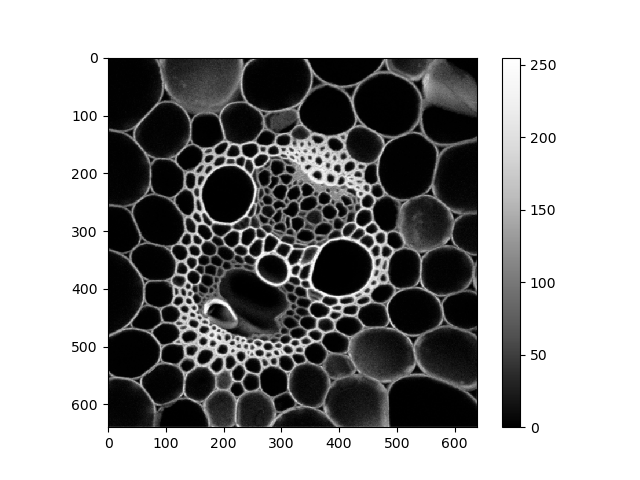
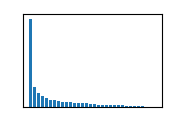

In [2]:
image = imread("../../data/maize_clsm.tif")

stackview.insight(image)

Ein entsprechendes Label-Bild sieht so aus:

cl.OCLArray([[  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       [  1,   1,   1, ..., 244, 244, 244],
       ...,
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234],
       [  6,   6,   6, ..., 234, 234, 234]], dtype=uint32)
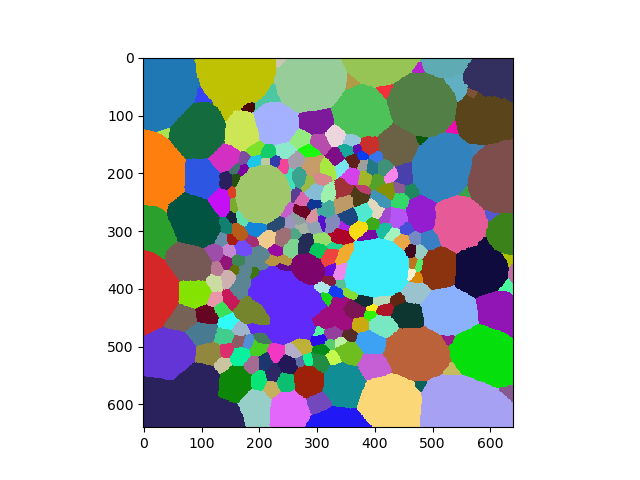

In [3]:
labels = imread("../../data/maize_clsm_labels.tif")
labels = cle.exclude_small_labels(labels, maximum_size=200)
labels = cle.extend_labeling_via_voronoi(labels)
labels

## Größenmessung
Zuerst müssen wir die Größe der Objekte quantifizieren. Wir können diese Messungen sofort als parametrisches Bild visualisieren.

cl.OCLArray([[10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       [10411., 10411., 10411., ...,  5352.,  5352.,  5352.],
       ...,
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.],
       [14283., 14283., 14283., ..., 12378., 12378., 12378.]],
      dtype=float32)
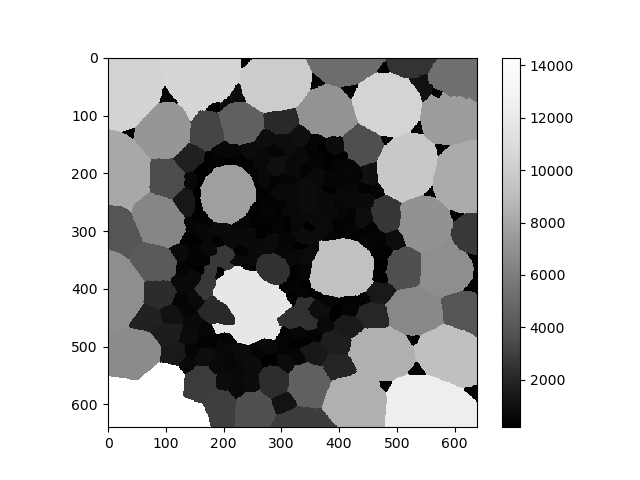
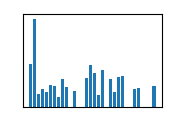

In [4]:
size_map_image = cle.pixel_count_map(labels)

size_map_image

## Regionale Eigenschaften
Wir können diese Messungen nun lokal zusammenfassen, z.B. indem wir die durchschnittliche Größe jeder Zelle und ihrer entsprechenden benachbarten Zellen messen.

cl.OCLArray([[6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       [6178.3335, 6178.3335, 6178.3335, ..., 3341.2   , 3341.2   ,
        3341.2   ],
       ...,
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ],
       [4809.5   , 4809.5   , 4809.5   , ..., 5657.    , 5657.    ,
        5657.    ]], dtype=float32)
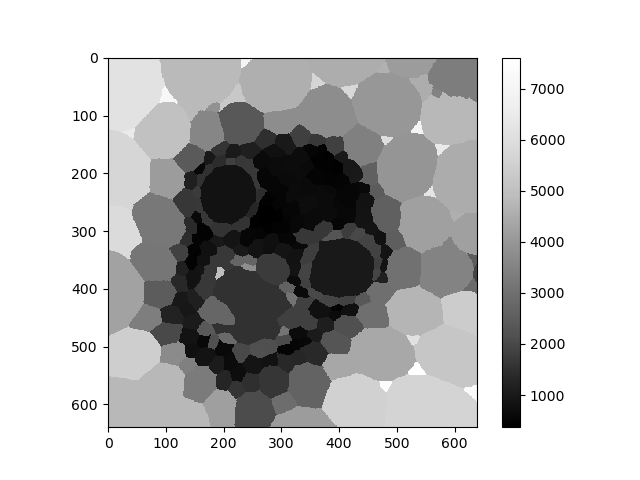
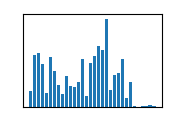

In [5]:
cle.mean_of_touching_neighbors_map(size_map_image, labels)

Wir können auch die Standardabweichung der Größe berechnen, die die Grenzen zwischen den Regionen mit Zellen unterschiedlicher Größe hervorhebt.

cl.OCLArray([[3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       [3169.5137, 3169.5137, 3169.5137, ..., 2035.8579, 2035.8579,
        2035.8579],
       ...,
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436],
       [3431.5947, 3431.5947, 3431.5947, ..., 3472.4436, 3472.4436,
        3472.4436]], dtype=float32)
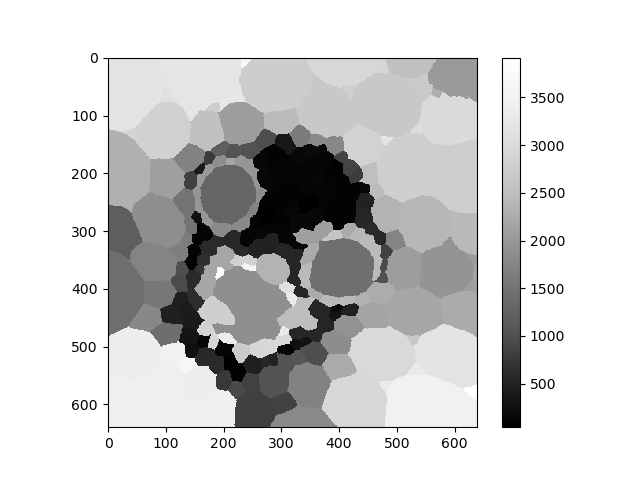
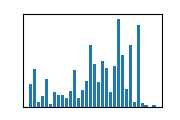

In [6]:
cle.standard_deviation_of_touching_neighbors_map(size_map_image, labels)